In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from iminuit import Minuit

#  Problem #1

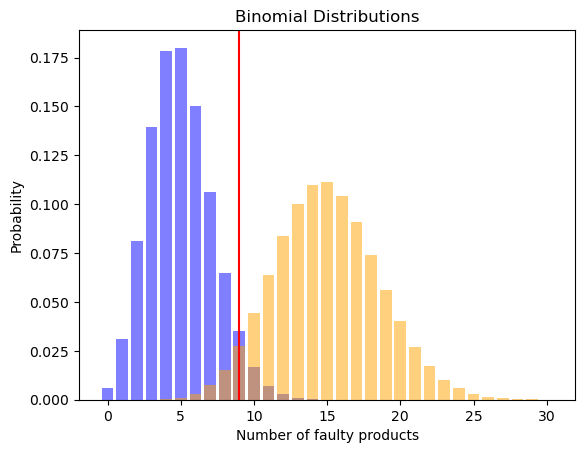

In [2]:
# Set parameters of the binomial distributions
n1 = 100  # number of trials
p1 = 0.05  # probability of success
n2 = 100  # number of trials
p2 = 0.15  # probability of success

# Generate a sequence of possible number of successes
x = range(31)

# Calculate the probability of each number of successes for the first distribution
y1 = stats.binom.pmf(x, n1, p1)

# Calculate the probability of each number of successes for the second distribution
y2 = stats.binom.pmf(x, n2, p2)

# Plot the first binomial distribution
plt.bar(x, y1, color='blue',alpha=0.5)

# Plot the second binomial distribution
plt.bar(x, y2, color='orange',alpha=0.5)

# Add a red cut line at x=9
plt.axvline(x=9, color='red')

plt.xlabel('Number of faulty products')
plt.ylabel('Probability')
plt.title('Binomial Distributions')
plt.show()


 The significance level, α, of a hypothesis test is the probability of rejecting the null hypothesis (H0) when it is actually true. In this case, the null hypothesis is that the true faulty rate is 5%, and the threshold you have chosen is 9 faulty monitors. If the number of faulty monitors found in the sample of 100 is 9 or fewer, you will accept the null hypothesis. So, the significance level is the probability of finding 9 or fewer faulty monitors in a sample of 100 if the true faulty rate is 5%.

In [3]:
alpha = sum(y1[10:])
beta = sum(y2[:10])

In [4]:
print(f' Alpha =  {alpha:.3f}')
print(f' Beta =  {beta:.3f}')

 Alpha =  0.028
 Beta =  0.055


#  Problem #2

# (a) 

In [5]:
import math

class Gaussian:
    def __init__(self, mean, stddev):
        self.mean = mean
        self.stddev = stddev
        self.const = 1.0 / (math.sqrt(2*math.pi) * stddev)

    def integralAbove(self, xval):
        """Calculates the integral of the Gaussian distribution above xval. """
        return 0.5 * (1.0 + math.erf((xval - self.mean) / (self.stddev * math.sqrt(2))))

    def integralBelow(self, xval):
        """Calculates the integral of the Gaussian distribution below xval. """
        return 1 - self.integralAbove(xval)


Eg of class in action

In [6]:
gaussian = Gaussian(5, 2)
above_xval = gaussian.integralAbove(3)
below_xval = gaussian.integralBelow(3)


In [7]:
above_xval

0.15865525393145713

# (b) 

We will perform Monte carlo in the first step and which will directly lead to test statistics in efficient and elegant way.

This plot is dipicting our approch. We will randomply pick two points on these gaussian plots. and difference of two points will be model model of actual time resolution picked by our apratus.

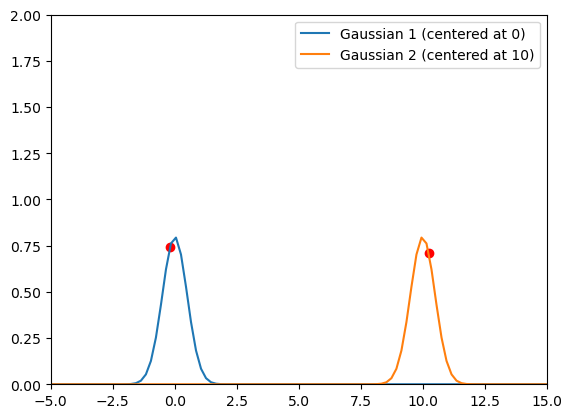

In [8]:
# Define the standard deviation
std = .5

# Create the x-axis values
x = np.linspace(-5, 15, 100)

# Create the first Gaussian curve (centered at 0)
y1 = np.exp(-(x-0)**2/(2*std**2)) / (std*np.sqrt(2*np.pi))

# Create the second Gaussian curve (centered at 10)
y2 = np.exp(-(x-10)**2/(2*std**2)) / (std*np.sqrt(2*np.pi))

#crete random point
x_1 = np.random.normal(10,0.2)
x_2 = np.random.normal(0,0.2)

y_1 = np.exp(-(x_1-10)**2/(2*std**2)) / (std*np.sqrt(2*np.pi))
y_2 = np.exp(-(x_2-0)**2/(2*std**2)) / (std*np.sqrt(2*np.pi))


#plot them
plt.scatter(x_1, y_1, color='r')
plt.scatter(x_2, y_2, color='r')



plt.ylim(0, 2)
plt.xlim(-5,15)
# Plot the two Gaussian curves
plt.plot(x, y1, label='Gaussian 1 (centered at 0)')
plt.plot(x, y2, label='Gaussian 2 (centered at 10)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Following Class will perform monte carlo psudo experiment of appratus observations.

In [9]:
class function_generator:
    
    def __init__(self,num,m1,m2,p):
        self.num = num
        self.m1 = m1
        self.m2 = m2
        self.p = p
        self.timeres=400*10**-12
        self.c=3*10**8
        
    
    def piondata(self):
        
        list =[]
        for i in range(self.num):    
            x_1 = np.random.normal(0,self.timeres)
            x_2 = np.random.normal(((20/self.c)*np.sqrt(1+(self.m1/self.p)**2)),self.timeres)
            
            list.append(x_2-x_1)
            
        return list
    
    def kiondata(self):
        
        list =[]
        for i in range(self.num):    
            x_1 = np.random.normal(0,self.timeres)
            x_2 = np.random.normal(((20/self.c)*np.sqrt(1+(self.m2/self.p)**2)),self.timeres)
 
            
            list.append(x_2-x_1)
            
        return list      

Following is example of producing test statistics from monte carlo experiment.(abstract values)

In [10]:
dif=function_generator(1000,500,150,2000)
#(number of observations, mass of particle 1 (Mev/c^2),mass of particle 1 (Mev/c^2), momentum of particle (Mev/c))

In [11]:
dat1=dif.piondata()
dat2=dif.kiondata()

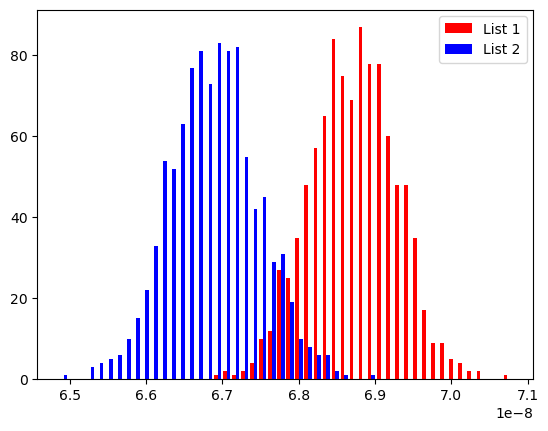

In [12]:
#bins=5, range=[0, 11],

plt.hist([dat1, dat2],bins=50,  color=['r', 'b'], label=['List 1', 'List 2'])
plt.legend()
plt.show()


# (c) 

Now we will perform analysis with the given data

In [13]:
dif1=function_generator(100,493.7,139.6,3000)
dif2=function_generator(100,493.7,139.6,4000)
dif3=function_generator(100,493.7,139.6,6000)

In [14]:
dat1=dif1.piondata()
dat2=dif1.kiondata()
dat3=dif2.piondata()
dat4=dif2.kiondata()
dat5=dif3.piondata()
dat6=dif3.kiondata()

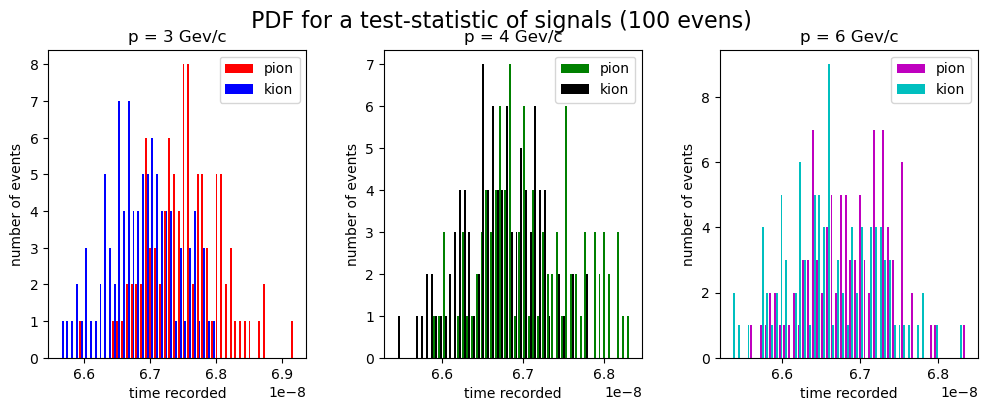

In [15]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot dat1 and dat2 in the first subplot
axs[0].hist([dat1, dat2], bins=50, color=['r', 'b'], label=['pion', 'kion'])
axs[0].legend()
axs[0].set_title('p = 3 Gev/c')
axs[0].set_xlabel('time recorded')
axs[0].set_ylabel('number of events')

# Plot dat3 and dat4 in the second subplot
axs[1].hist([dat3, dat4], bins=50, color=['g', 'k'], label=['pion', 'kion'])
axs[1].legend()
axs[1].set_title('p = 4 Gev/c')
axs[1].set_xlabel('time recorded')
axs[1].set_ylabel('number of events')

# Plot dat5 and dat6 in the third subplot
axs[2].hist([dat5, dat6], bins=50, color=['m', 'c'], label=['pion', 'kion'])
axs[2].legend()
axs[2].set_title('p = 6 Gev/c')
axs[2].set_xlabel('time recorded')
axs[2].set_ylabel('number of events')

# Add a global title
fig.suptitle(' PDF for a test-statistic of signals (100 evens)', fontsize=16)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


taking p = 3 Gev/c will give better performance, as it is easy to distinguish PDF of both particles. This statement can easily be stated with alpha and beta numbers to be calculated from the above plots in complicated test statistics. But in our case its obvious from plot that slower momentum will lead better results.

#  Problem #3

total # of events = 43.0 # of bins = 50


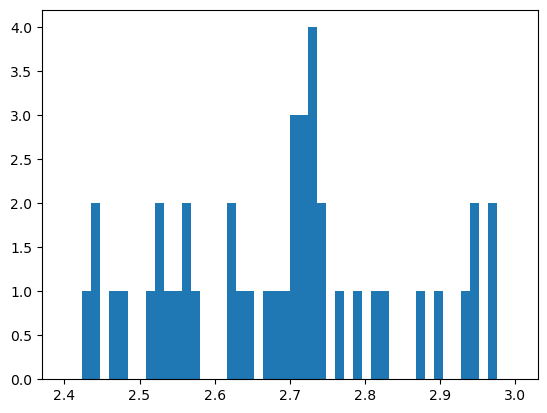

In [16]:
nbins = 50
XMIN = 2.4  # in GeV
XMAX = 3.0  # in GeV
bins = np.linspace(XMIN, XMAX, nbins)
counts = np.array([0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1,
                   0, 1, 1, 1, 3, 3, 4, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
                   0, 1, 2, 0, 2, 0, 0]).astype(float)

tot = 0
for i in counts:
    tot += i
print("total # of events =", tot, "# of bins =", len(counts))
plt.hist(bins, bins=len(counts), weights=counts, range=(min(bins), max(bins)))
plt.show()

# 3.1

# (a)

In [17]:
average_background_per_bin = tot/len(counts)
print(f' Average Background Per Bin =  {average_background_per_bin:.2f}')

 Average Background Per Bin =  0.86


# (b)

In [18]:
peak_location = bins[np.argmax(counts)]
print(f' peak_location =  {peak_location:.2f}')

 peak_location =  2.73


# (c)

In [19]:
sigma = 12 * 10**-3 # in GeV
window = peak_location + np.array([-2.5, 2.5]) * sigma
Nobs = sum(counts[(bins >= window[0]) & (bins <= window[1])])
print(f' Nobs =  {Nobs:.2f}')

 Nobs =  12.00


# (d)

In [20]:
import scipy
from scipy.stats import poisson

Nbgd = average_background_per_bin * 5
p_value = poisson.sf(Nobs, Nbgd)
stdev = scipy.special.erfinv(1 - p_value) * np.sqrt(2)
print(f' stdev =  {stdev:.2f}')

 stdev =  3.46


# 3.2

# (a) and (b) = Analysis with H0 (Flat Backgrown) 

In [21]:
def flat(a):
    nbins = 50
    XMIN = 0  # in GeV
    XMAX = 50  # in GeV
    bins = np.linspace(XMIN, XMAX, nbins) 
    return np.ones(nbins)*a

In [22]:
def kai_square_H0(a):
    kai=[]
    for i in range(50):
        funct1=counts[i]/flat(a)[i]
        if funct1 <= 0:
            funct1 = 0.001        
        kai.append(2*(flat(a)[i]-counts[i]+counts[i]*np.log(funct1)))
    return sum(kai)   

In [23]:
les1=Minuit(kai_square_H0,a=1)
les1.errordef=0.5
les1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 56.65                      │              Nfcn = 18               │
│ EDM = 2.29e-09 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.86    │   0.09    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0086 │
└───┴────────┘

In [24]:
kai_H0=kai_square_H0(les1.values[0])
print(f' Kai_square for H0 hypothesis is =  {kai_H0:.2f}')

 Kai_square for H0 hypothesis is =  56.65


# (a) and (b) = Analysis with H1 (gausian signal)

In [25]:
def function(a,mean):
    nbins = 50
    XMIN = 0  # in GeV
    XMAX = 50  # in GeV
    bins = np.linspace(XMIN, XMAX, nbins) 
    std=1
    return (1/(std*((2*math.pi)**(1/2)))*math.e**((-1/2)*((bins-mean)/std)**2)) + a

In [26]:
def kai_square(a,mean):
    kai=[]
    for i in range(50):
        funct1=counts[i]/function(a,mean)[i]
        if funct1 <= 0:
            funct1 = 0.001        
        kai.append(2*(function(a,mean)[i]-counts[i]+counts[i]*np.log(funct1)))
    return sum(kai)

# (c)

N fits will scan the mass spectrum by assuming each time that the location of the signal is fixed at the centre of the i-th bin.

In [27]:
a_val=[]
kai_val=[]
for i in range(50):
    def kai_spec(a):
        return kai_square(a,i)
    les2=Minuit(kai_spec,a=1)
    les2.errordef=0.5
    les2.migrad()
    a_val.append(les2.values[0])
    kai_val.append(kai_square(les2.values[0],i))

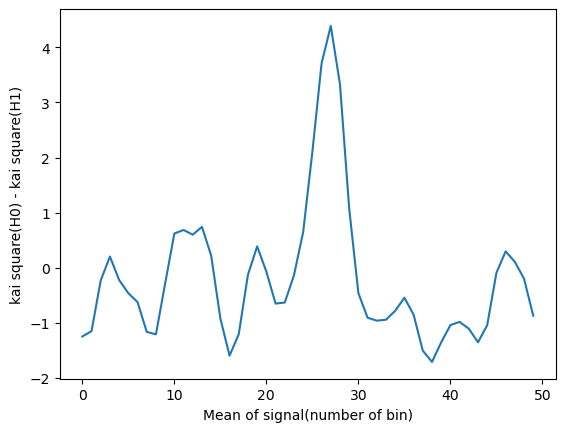

In [28]:
y = np.ones(50)*kai_H0-kai_val

x = range(len(y))
plt.plot(x, y)
plt.xlabel('Mean of signal(number of bin)')
plt.ylabel('kai square(H0) - kai square(H1)')
plt.show()

# (d)

In [29]:
p_value = 1 - stats.chi2.cdf(max(y), 2)
print(f' p_value =  {p_value:.2f}')

 p_value =  0.11


In [30]:
from scipy.special import erfinv

In [31]:
significance_level = erfinv(1 - p_value) * np.sqrt(2)
print(f' significance_level =  {significance_level:.2f}')

 significance_level =  1.59
